In [ ]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv("./Train.csv")
test = pd.read_csv("./Test.csv")
submission = pd.read_csv('./SampleSubmission.csv')

In [ ]:
print ("Rows     : " ,train.shape[0])
print ("Columns  : " ,train.shape[1])
print ("\nFeatures : \n" ,train.columns.tolist())
print ("\nMissing values :  ", train.isnull().sum().values.sum())
print ("\nUnique values :  \n",train.nunique())

Rows     :  2154048
Columns  :  19

Features : 
 ['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN']

Missing values :   14380032

Unique values :  
 user_id           2154048
REGION                 14
TENURE                  8
MONTANT              6540
FREQUENCE_RECH        123
REVENUE             38114
ARPU_SEGMENT        16535
FREQUENCE              91
DATA_VOLUME         41550
ON_NET               9884
ORANGE               3167
TIGO                 1315
ZONE1                 612
ZONE2                 486
MRG                     1
REGULARITY             62
TOP_PACK              140
FREQ_TOP_PACK         245
CHURN                   2
dtype: int64


In [ ]:
train.sample(5)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1451133,ac7f859667f6ba5f67348cfa04b81d93e5277db2,NaN,K > 24 month,100.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
1164817,8a8f58ccc57fcffc63ff76da46115508500e4517,LOUGA,K > 24 month,3000.0,6.0,3000.0,1000.0,7.0,NaN,2.0,29.0,26.0,NaN,NaN,NO,18,All-net 500F=2000F;5d,5.0,0
931686,6ed3ff0796342d578d9a1cff28defe475c5658ab,DIOURBEL,K > 24 month,7500.0,9.0,7078.0,2359.0,8.0,3386.0,20.0,94.0,6.0,NaN,NaN,NO,10,All-net 500F=2000F;5d,7.0,0
870292,678215d033254ba2353714985590d263ca15e09e,THIES,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,56,NaN,NaN,0
499691,3b6817a6f1f0c54efad2ca3da8802e0f4db575ce,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,655.0,NaN,NaN,NaN,NaN,NaN,NO,17,NaN,NaN,0


DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

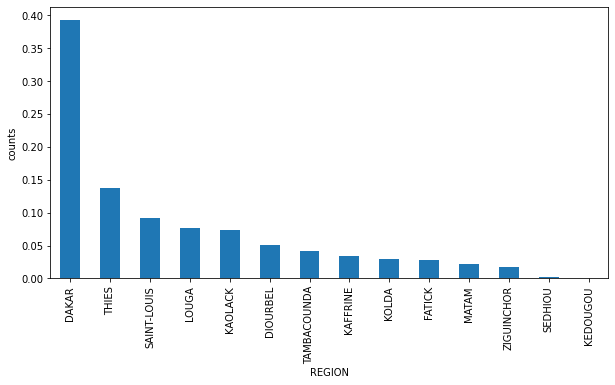

In [ ]:
print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

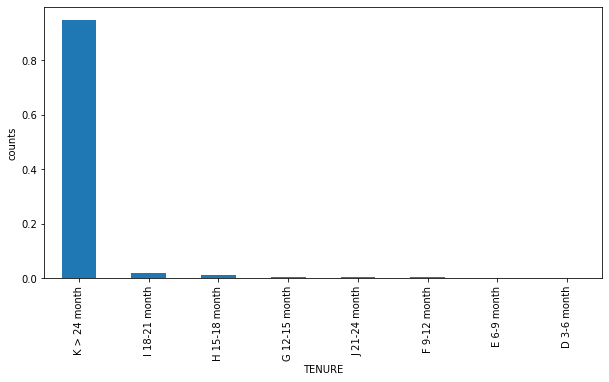

In [ ]:
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    2154048
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

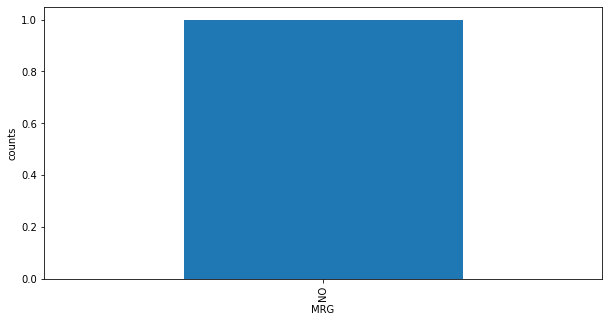

In [ ]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

NO    2154048
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

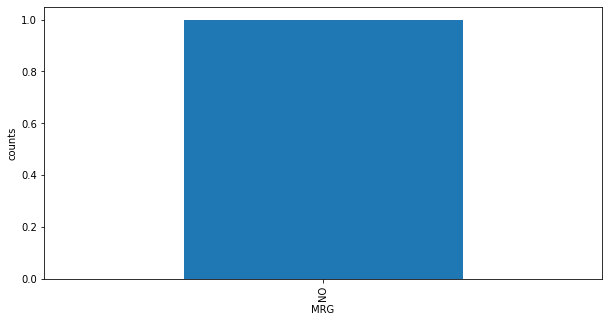

In [ ]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

0    1750062
1     403986
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

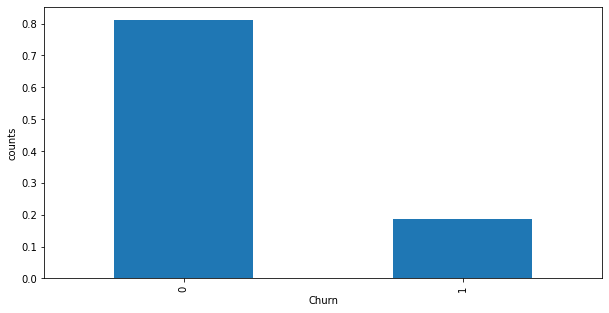

In [ ]:
#Check if the predictor class is balanced 
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [ ]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [ ]:
train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) #drop these columns

In [ ]:
test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [ ]:
# replace nan values in train with the average

train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [ ]:
# replace nan values in train with the average

test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [ ]:
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

In [ ]:
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN'] # labels
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(2154048, 14)
(2154048,)
(380127, 14)


In [ ]:
#  split x and y into 80% train, 20% test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=1) 
print(X_train.shape)
print(y_train.shape)
 
print(X_test.shape)
print(y_test.shape)

(1723238, 14)
(1723238,)
(430810, 14)
(430810,)


In [ ]:
#Standardizing the numeric values using standard scaler

num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']
 
scaler = StandardScaler()
 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols]) #normalize X_train

In [ ]:
X_test[num_cols] = scaler.transform(X_test[num_cols]) #normalize X_test
X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
417912,K > 24 month,5.502588,0.885416,5.575112,5.574948,1.004481,-0.163604,1.496644,6.809629,3.852092,0.00023,-0.000108,1.523363,2.538585
1380278,K > 24 month,-0.355472,-0.423838,-0.344255,-0.344088,-0.583376,-0.000323,-0.355039,-0.034757,-0.400792,0.00023,-0.000108,-0.226325,-0.243389
657158,K > 24 month,-0.000121,-0.000283,-0.000226,-0.000226,-0.000203,-0.000323,-0.000328,-0.000225,-0.000144,0.00023,-0.000108,-0.181461,-0.000238
228934,I 18-21 month,-0.000121,-0.000283,-0.000226,-0.000226,-0.000203,-0.000323,-0.000328,-0.000225,-0.000144,0.00023,-0.000108,-1.213328,-0.000238
2020145,K > 24 month,2.197593,0.417826,2.153657,2.153487,0.252338,-0.000323,0.118980,0.634387,-0.500274,0.00023,-0.000108,1.119589,0.826601


In [ ]:
test[num_cols] = scaler.transform(test[num_cols]) #normalize test set
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,K > 24 month,-0.093171,-0.610874,-0.087620,-0.087452,-0.750519,-0.002462,0.143326,-0.538208,-0.450533,-0.00027,0.011673,0.626087,-0.457388
1,I 18-21 month,-0.915048,-0.891428,-0.887294,-0.887128,-0.917661,-0.312438,0.001272,-0.608309,-0.001566,-0.00027,0.011673,0.581223,-0.885384
2,K > 24 month,-0.390446,1.259489,-0.361364,-0.361539,1.004481,0.397362,-0.398002,-0.595563,-0.450533,-0.00027,0.011673,1.299044,1.361596
3,K > 24 month,-0.001373,-0.001150,-0.002130,-0.002130,-0.001889,-0.002462,0.001272,-0.001663,-0.001566,-0.00027,0.011673,-0.854418,-0.001402
4,K > 24 month,-0.001373,-0.001150,-0.002130,-0.002130,-0.001889,-0.002462,0.001272,-0.001663,-0.001566,-0.00027,0.011673,-0.809554,-0.001402


In [ ]:
###### Encode tenure column ############
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])
X_test["TENURE"] = encoder.fit_transform(X_test["TENURE"])
test['TENURE'] = encoder.fit_transform(test["TENURE"])

In [ ]:
import tensorflow as tf
from keras.layers import *
from keras.models import Model
from keras.initializers import glorot_normal

def get_model():

  inputs = Input((X_train.shape[1],), dtype=tf.float32) # inputs of shape (None, 14)

  #Stack 4 dense layers each with 128 neurons/units
  x = Dense(units= 128, kernel_initializer = 'uniform',  activation='relu')(inputs)
  x = Dense(units= 128, kernel_initializer = 'uniform', activation='relu')(x)
  x = Dense(units= 128, kernel_initializer = 'uniform', activation='relu')(x)
  x = Dense(units= 128, kernel_initializer = 'uniform', activation='relu')(x)
  
  # Add skip connections to speed up the training process
  ### Begin of skip connections ###
  x = add([x , Dense(128, kernel_initializer = 'uniform', activation='relu')(x)])
  x = add([x , Dense(128, kernel_initializer = 'uniform', activation='relu')(x)])

   ### End of skip connections ###

  #add a dropout layer with 0.15 dropout rate
  x = Dropout(0.15)(x)

  outputs = Dense(1,  kernel_initializer=glorot_normal(seed=1),
                  bias_initializer=glorot_normal(seed=1),
                  activation='sigmoid')(x)                
  model = Model(inputs =inputs, outputs=outputs)
  model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
  return model

Using TensorFlow backend.


In [ ]:
model = get_model() # load model
model.summary() # view summary

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 14)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          1920        input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          16512       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          16512       dense_2[0][0]                    
____________________________________________________________________________________________

In [ ]:
from keras.callbacks import EarlyStopping
  
es = EarlyStopping(monitor ="val_loss", mode="min", verbose= 1, patience = 3) #instantiate an earlystopping mechanism
 
model.fit(X_train,
          y_train, 
          validation_data=(X_test, y_test) ,
          epochs=50, 
          callbacks=[es] ,batch_size=1024, verbose=2)

Train on 1723238 samples, validate on 430810 samples
Epoch 1/50
 - 9s - loss: 0.3071 - accuracy: 0.8594 - val_loss: 0.2992 - val_accuracy: 0.8641
Epoch 2/50
 - 8s - loss: 0.2995 - accuracy: 0.8641 - val_loss: 0.2981 - val_accuracy: 0.8644
Epoch 3/50
 - 8s - loss: 0.2984 - accuracy: 0.8644 - val_loss: 0.2968 - val_accuracy: 0.8642
Epoch 4/50
 - 8s - loss: 0.2978 - accuracy: 0.8646 - val_loss: 0.2978 - val_accuracy: 0.8632
Epoch 5/50
 - 8s - loss: 0.2973 - accuracy: 0.8647 - val_loss: 0.2956 - val_accuracy: 0.8644
Epoch 6/50
 - 8s - loss: 0.2968 - accuracy: 0.8648 - val_loss: 0.2968 - val_accuracy: 0.8646
Epoch 7/50
 - 8s - loss: 0.2966 - accuracy: 0.8648 - val_loss: 0.2954 - val_accuracy: 0.8643
Epoch 8/50
 - 8s - loss: 0.2964 - accuracy: 0.8649 - val_loss: 0.2961 - val_accuracy: 0.8646
Epoch 9/50
 - 8s - loss: 0.2961 - accuracy: 0.8649 - val_loss: 0.2959 - val_accuracy: 0.8643
Epoch 10/50
 - 8s - loss: 0.2961 - accuracy: 0.8649 - val_loss: 0.2953 - val_accuracy: 0.8641
Epoch 11/50
 - 8

In [ ]:
y_test_predicted = model.predict(test, batch_size = 1024) 

In [ ]:
submission["CHURN"] = y_test_predicted
 
submission.to_csv('submission.csv', index=False)